### 2021.11.1(4/8)

### barplot + 해들리위컴의 그래프레이어

#### 기본사용법

In [1]:
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt

In [2]:
g=['A']*100+['B']*200
y=list(np.random.randn(100)*2+2)+list(np.random.randn(200)+3)

In [3]:
df=pd.DataFrame({'g':g,'y':y})
df

,g,y
0,A,4.044824
1,A,2.580658
2,A,3.269251
3,A,3.302310
4,A,0.973601
...,...,...
295,B,3.761853
296,B,2.509434
297,B,3.496341
298,B,2.652094


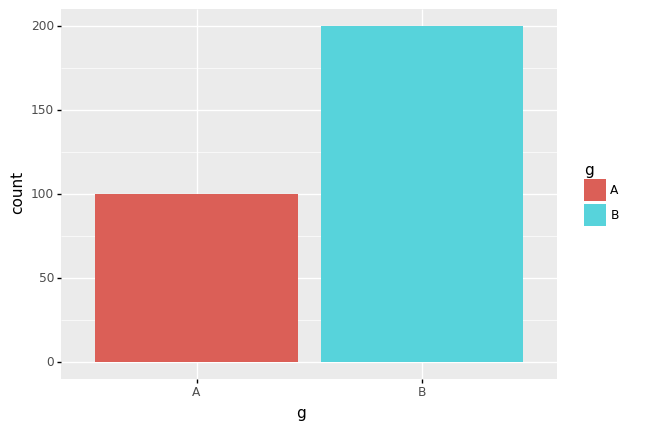

<ggplot: (8769972966108)>

In [4]:
ggplot(df)+geom_bar(aes(x='g',fill='g')) ## 디폴트로 카운트를 수행해줌

`-` 이것은 아래의 코드와 같다.

In [5]:
df.groupby(by='g').count()

,y
g,
A,100
B,200


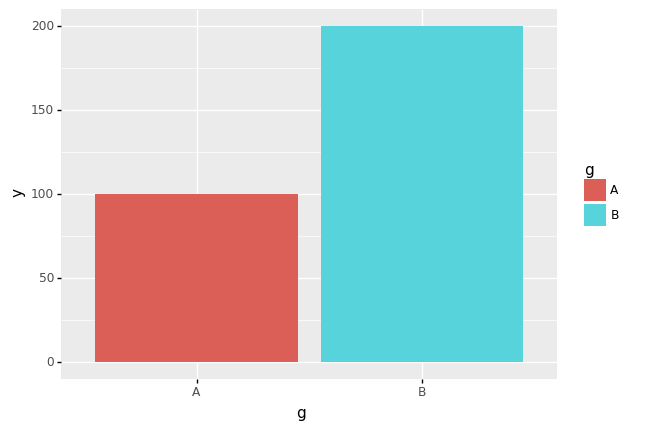

<ggplot: (8769972980655)>

In [6]:
fig=ggplot(df.groupby(by='g').count().reset_index())
fig+geom_bar(aes(x='g',y='y',fill='g'),stat='identity')

`-` barplot은 기본적으로 groupby+count()가 내장되어 있다. 따라서 아래의 코드

```r
ggplot(df)+geom_bar(aes(x='g',fill='g'))
```

를 좀더 엄밀하게 쓰면

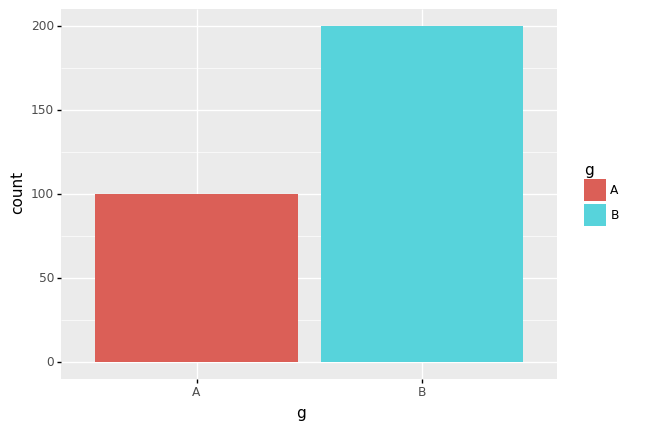

<ggplot: (8769990295037)>

In [7]:
ggplot(df)+geom_bar(aes(x='g',fill='g'),stat='count')

`-` 이것은 때때로 불편하다. 왜냐하면 데이터프레임을 변환하는 것은 판다스를 이용하는게 더 쉽고 자유로움

#### Barplot의 불편한점 1

In [8]:
td=df.groupby(by='g').count().reset_index() #(tidy data)
td

,g,y
0,A,100
1,B,200


`-` 그냥 `x=g,y=y`를 맵핑하여 그리면 안되나?

<BarContainer object of 2 artists>

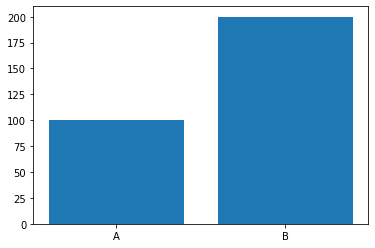

In [9]:
plt.bar(td.g,td.y)

<AxesSubplot:xlabel='g'>

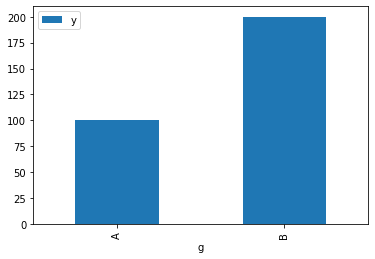

In [10]:
td.plot(kind='bar',x='g',y='y')

`-` 그런데 ggplot을 쓰려고 하면 ?

In [11]:
#ggplot(td)+geom_bar(aes(x='g',y='y',fill='g')) => 에러, 기본적으로 'count'함수로 되어있기 때문

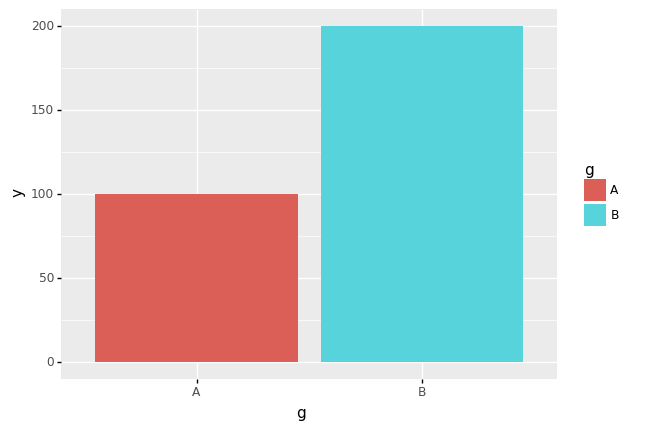

<ggplot: (8769973009680)>

In [12]:
ggplot(td)+geom_bar(aes(x='g',y='y',fill='g'),stat='identity')

- 너무 불편하다.. stat='identity'를 항상 써야하는것이!

#### Barplot의 불편한점 2

`-` groupby를 자동으로 해주므로 익숙해지면 ggplot2 방식이 더 편하지 않을까? $\to$ groupby 하는게 더 편해요..

In [13]:
df.groupby('g').agg({'y':[np.mean,np.median,np.std,lambda x: np.max(x)-np.min(x)]})

y                               
       mean    median       std <lambda_0>
g                                         
A  1.957066  2.092485  1.769598   8.579945
B  2.998402  3.015775  0.943449   5.203707

In [14]:
_=df.groupby('g').agg({'y':[np.mean,np.median,np.std,lambda x: np.max(x)-np.min(x)]})
_.columns

MultiIndex([('y',       'mean'),
            ('y',     'median'),
            ('y',        'std'),
            ('y', '<lambda_0>')],
           )

In [15]:
df.groupby('g').agg({'y':[np.mean,np.median,np.std,lambda x: np.max(x)-np.min(x)]})\
.rename(columns={'<lambda_0>':'range'}).stack().reset_index()

,g,level_1,y
0,A,mean,1.957066
1,A,median,2.092485
2,A,range,8.579945
3,A,std,1.769598
4,B,mean,2.998402
5,B,median,3.015775
6,B,range,5.203707
7,B,std,0.943449


In [16]:
tb=df.groupby('g').agg({'y':[np.mean,np.median,np.std,lambda x: np.max(x)-np.min(x)]})\
.rename(columns={'<lambda_0>':'range'}).stack().reset_index()

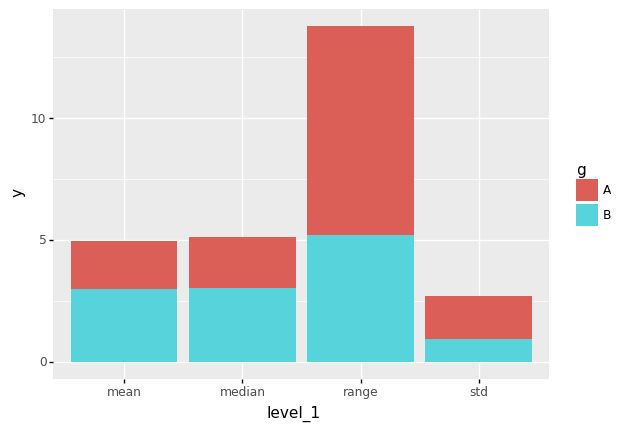

<ggplot: (8769972981655)>

In [17]:
ggplot(tb)+geom_bar(aes(x='level_1',y='y',fill='g'),stat='identity')

`-`position이 디폴트로 stack으로 되어있다. barplot이 이래서 맘에 안든다 $\to$ position='dodge'로!

#### position

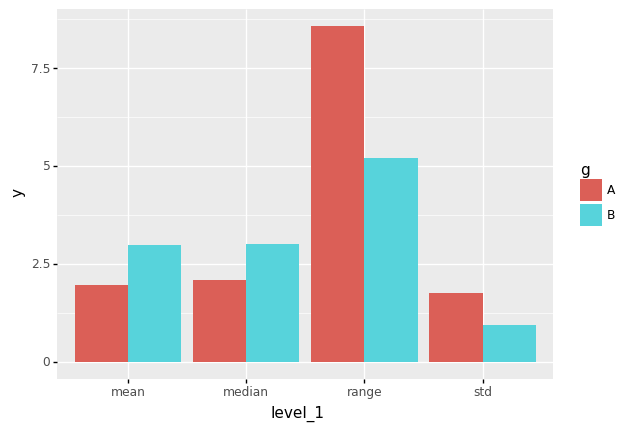

<ggplot: (8769972971671)>

In [18]:
ggplot(tb)+geom_bar(aes(x='level_1',y='y',fill='g'),stat='identity',position='dodge')

#### coord_flip()

`-` 때때로 아래와 같이 보는 것이 더 좋은 경우도 있음

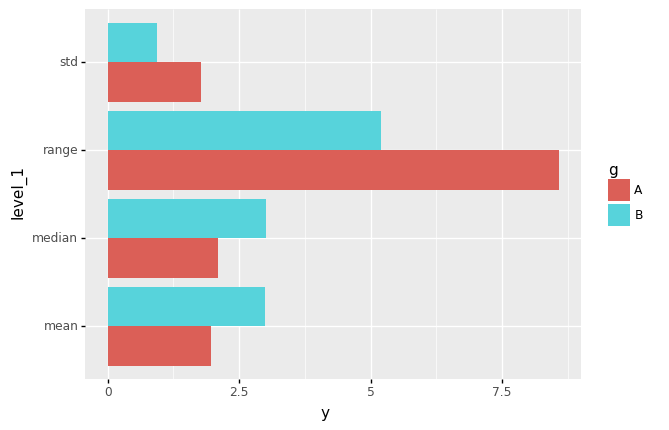

<ggplot: (8770005587167)>

In [19]:
ggplot(tb)\
+geom_bar(aes(x='level_1',y='y',fill='g'),stat='identity',position='dodge')\
+coord_flip()

#### facet_wrap()

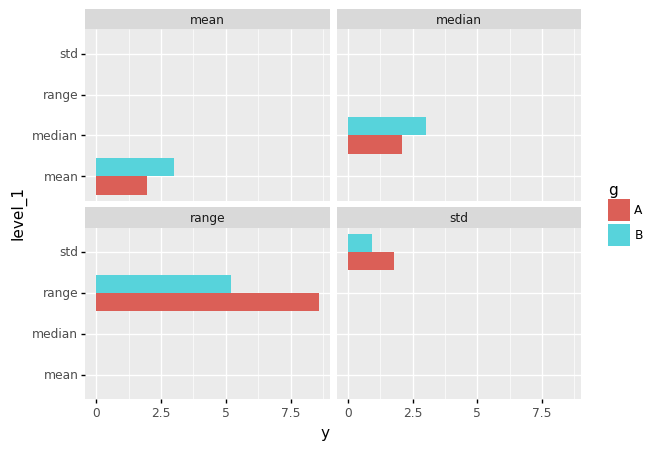

<ggplot: (8770005590821)>

In [20]:
ggplot(tb)\
+geom_bar(aes(x='level_1',y='y',fill='g'),stat='identity',position='dodge')\
+coord_flip()\
+facet_wrap('level_1')

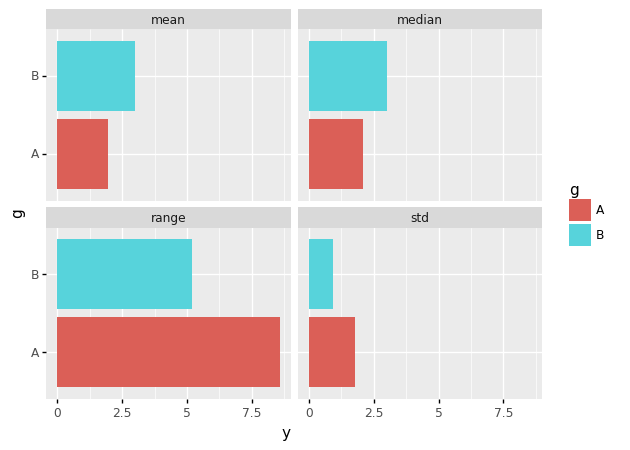

<ggplot: (8770005713851)>

In [21]:
ggplot(tb)\
+geom_bar(aes(x='g',y='y',fill='g'),stat='identity',position='dodge')\
+coord_flip()\
+facet_wrap('level_1')

해들리위컴의 그래프레이어

`-` 데이터셋 + 맵핑 + 지움 + 포지션 + 스탯 + 축 + 면분할

- 데이터셋 : 판다스
- 맵핑 : x축, y축, 색깔, 크기, 투명도
- 지옴 : 포인트지옴, 바지옴, 라인지옴, 스무스지옴
- 포지션 : jutter, dodge, identity
- 스탯 : identity, count
- 축 : coord_flip()
- 면분할:facet_wrap(),facet_grid()

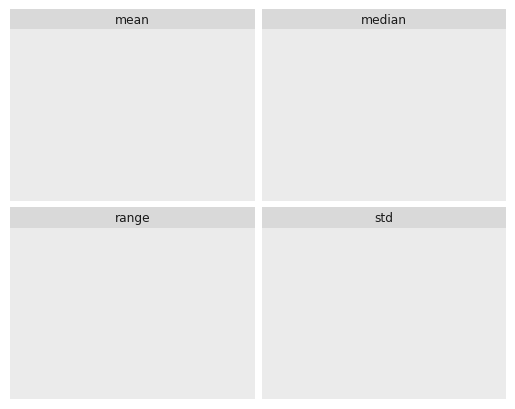

<ggplot: (8769973234110)>

In [22]:
ggplot(tb)+facet_wrap('level_1')
#+geom_bar(aes(x='g',y='y',fill='g'),stat='identity',position='dodge')+coord_flip()

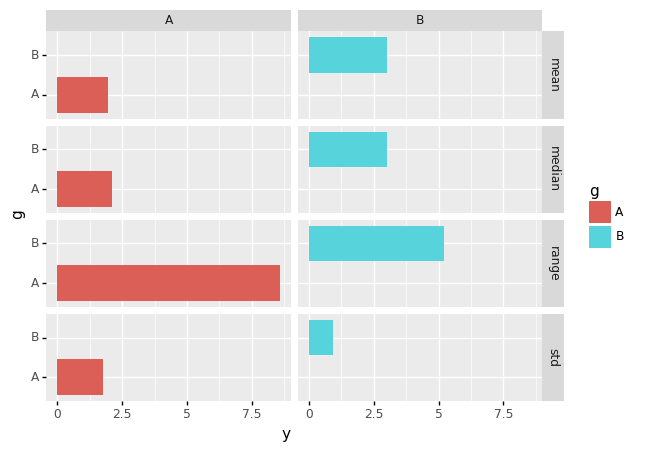

<ggplot: (8769990558362)>

In [23]:
ggplot(tb)+facet_grid('level_1~g')\
+geom_bar(aes(x='g',y='y',fill='g'),stat='identity',position='dodge')+coord_flip()  #lm(y~x)를 떠올리며

### 예제 : 심슨의 역설

In [24]:
DEP=(['A1']*2+['A2']*2+['B1']*2+['B2']*2)*2
GEN=['M']*8+['F']*8
STATE=['PASS','FAIL']*8
COUNT=(1,9,2,8,80,20,85,15,5,5,5,5,9,1,9,1)

In [25]:
df=pd.DataFrame({'DEP':DEP,'STATE':STATE,'GEN':GEN,'COUNT':COUNT})

In [26]:
df

,DEP,STATE,GEN,COUNT
0,A1,PASS,M,1
1,A1,FAIL,M,9
2,A2,PASS,M,2
3,A2,FAIL,M,8
4,B1,PASS,M,80
5,B1,FAIL,M,20
6,B2,PASS,M,85
7,B2,FAIL,M,15
8,A1,PASS,F,5
9,A1,FAIL,F,5


In [27]:
df.groupby(['GEN','STATE']).agg({'COUNT':np.sum})

COUNT
GEN STATE       
F   FAIL      12
    PASS      28
M   FAIL      52
    PASS     168

In [28]:
28/40

0.7

In [29]:
168/(168+52)

0.7636363636363637

### 시각화1: 전체합격률을 barplot으로 시각화하자.

In [30]:
df.groupby(['GEN','STATE']).agg({'COUNT':np.sum})

COUNT
GEN STATE       
F   FAIL      12
    PASS      28
M   FAIL      52
    PASS     168

In [31]:
df.groupby(['GEN','STATE']).agg({'COUNT':np.sum}).reset_index()

,GEN,STATE,COUNT
0,F,FAIL,12
1,F,PASS,28
2,M,FAIL,52
3,M,PASS,168


In [32]:
df.groupby(['GEN']).agg({'COUNT':np.sum}).reset_index()

,GEN,COUNT
0,F,40
1,M,220


`-` 두개의 데이터프레임을 합쳐야 한다.

In [33]:
_df1=df.groupby(['GEN','STATE']).agg({'COUNT':np.sum}).reset_index()
_df2=df.groupby(['GEN']).agg({'COUNT':np.sum}).reset_index().rename(columns={'COUNT':'SUM'})

In [34]:
_df1

,GEN,STATE,COUNT
0,F,FAIL,12
1,F,PASS,28
2,M,FAIL,52
3,M,PASS,168


In [35]:
_df2

,GEN,SUM
0,F,40
1,M,220


`-` 단순한 방법

In [36]:
def f(x):
    if x=='F':
        return 40
    if x=='M':
        return 220

In [37]:
_df1['SUM']=list(map(f,_df1.GEN))
_df1

,GEN,STATE,COUNT,SUM
0,F,FAIL,12,40
1,F,PASS,28,40
2,M,FAIL,52,220
3,M,PASS,168,220


`-` 좀 더 좋은 방법

In [38]:
_df1=df.groupby(['GEN','STATE']).agg({'COUNT':np.sum}).reset_index()

- _df1를 다시 롤백

In [39]:
def f(_df2):
        return lambda x: _df2.query('GEN==@x').SUM.item()

In [40]:
_df1.GEN

0    F
1    F
2    M
3    M
Name: GEN, dtype: object

In [41]:
_df1['SUM']=list(map(f(_df2),_df1.GEN,))

In [42]:
_df1

,GEN,STATE,COUNT,SUM
0,F,FAIL,12,40
1,F,PASS,28,40
2,M,FAIL,52,220
3,M,PASS,168,220


`-` 더 좋은 방법

In [43]:
_df1=df.groupby(['GEN','STATE']).agg({'COUNT':np.sum}).reset_index()

- _df1를 다시 롤백

In [44]:
_df1

,GEN,STATE,COUNT
0,F,FAIL,12
1,F,PASS,28
2,M,FAIL,52
3,M,PASS,168


In [45]:
_df2

,GEN,SUM
0,F,40
1,M,220


In [46]:
pd.merge(_df1,_df2)

,GEN,STATE,COUNT,SUM
0,F,FAIL,12,40
1,F,PASS,28,40
2,M,FAIL,52,220
3,M,PASS,168,220


In [47]:
_df1.merge(_df2)

,GEN,STATE,COUNT,SUM
0,F,FAIL,12,40
1,F,PASS,28,40
2,M,FAIL,52,220
3,M,PASS,168,220


In [48]:
_df2.merge(_df1)

,GEN,SUM,STATE,COUNT
0,F,40,FAIL,12
1,F,40,PASS,28
2,M,220,FAIL,52
3,M,220,PASS,168


In [49]:
td=_df2.merge(_df1)
td

,GEN,SUM,STATE,COUNT
0,F,40,FAIL,12
1,F,40,PASS,28
2,M,220,FAIL,52
3,M,220,PASS,168


In [50]:
td['PROP']=td.COUNT/td.SUM

In [51]:
td

,GEN,SUM,STATE,COUNT,PROP
0,F,40,FAIL,12,0.300000
1,F,40,PASS,28,0.700000
2,M,220,FAIL,52,0.236364
3,M,220,PASS,168,0.763636


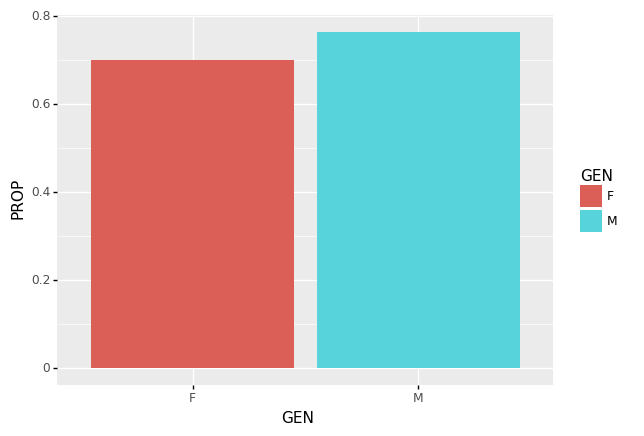

<ggplot: (8769972969997)>

In [52]:
ggplot(td.query('STATE=="PASS"'))+geom_bar(aes(x='GEN',y='PROP',fill='GEN'),stat='identity')

`-` 남자의 합격률이 더 높다. $\to$ 성차별이 있어보인다(?)

### 시각화2 : 학과별 합격률

`-` 학과별 합격률

In [53]:
df

,DEP,STATE,GEN,COUNT
0,A1,PASS,M,1
1,A1,FAIL,M,9
2,A2,PASS,M,2
3,A2,FAIL,M,8
4,B1,PASS,M,80
5,B1,FAIL,M,20
6,B2,PASS,M,85
7,B2,FAIL,M,15
8,A1,PASS,F,5
9,A1,FAIL,F,5


In [54]:
td=df.groupby(['DEP','GEN']).agg({'COUNT':sum}).reset_index()\
.rename(columns={'COUNT':'SUM'}).merge(df)

In [55]:
td['PROP']=td.COUNT/td.SUM

In [56]:
td

,DEP,GEN,SUM,STATE,COUNT,PROP
0,A1,F,10,PASS,5,0.50
1,A1,F,10,FAIL,5,0.50
2,A1,M,10,PASS,1,0.10
3,A1,M,10,FAIL,9,0.90
4,A2,F,10,PASS,5,0.50
5,A2,F,10,FAIL,5,0.50
6,A2,M,10,PASS,2,0.20
7,A2,M,10,FAIL,8,0.80
8,B1,F,10,PASS,9,0.90
9,B1,F,10,FAIL,1,0.10


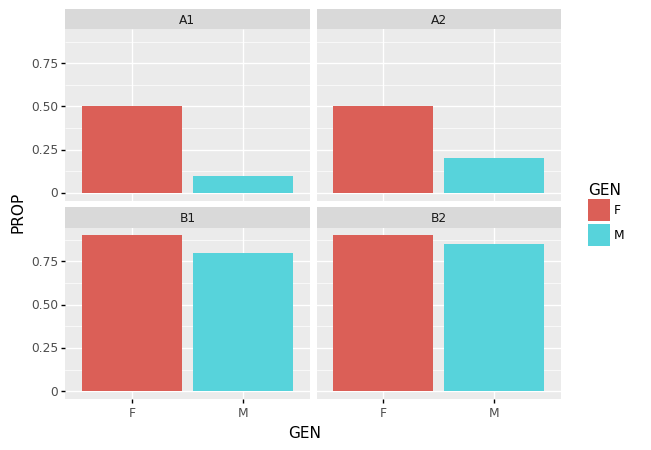

<ggplot: (8770005362535)>

In [57]:
ggplot(td.query('STATE=="PASS"'))\
+geom_bar(aes(x='GEN',y='PROP',fill='GEN'),stat='identity')\
+facet_wrap('DEP')